In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train),(X_test, y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

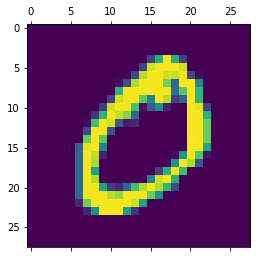

In [9]:
plt.matshow(X_train[1])

In [10]:
y_train[1]

0

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [26]:
X_train=X_train/255
X_test=X_test/255

In [27]:
X_train_flattened=X_train.reshape(len(X_train), 28*28)
X_test_flattened=X_test.reshape(len(X_test), 28*28)

In [28]:
X_test_flattened.shape

(10000, 784)

In [29]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4846 - accuracy: 0.8794
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3066 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2853 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2746 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2677 - accuracy: 0.9263


In [31]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2638 - accuracy: 0.9266


[0.26381388306617737, 0.9265999794006348]

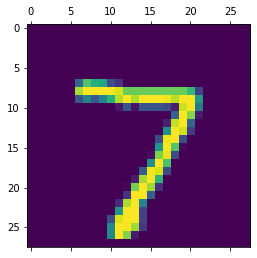

In [33]:
plt.matshow(X_test[0])

In [34]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

array([1.0885223e-05, 1.0859522e-10, 4.2766751e-05, 7.5330436e-03,
       9.2179840e-07, 9.1187278e-05, 1.2834172e-09, 7.5603402e-01,
       8.7742803e-05, 9.6786022e-04], dtype=float32)

In [36]:
np.argmax(y_predicted[0])

7

In [43]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [44]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [46]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    5,    8,    2,    4,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,    9,  924,   18,    7,    4,   13,   10,   39,    5],
       [   1,    0,   16,  925,    1,   20,    2,   11,   25,    9],
       [   1,    1,    3,    1,  912,    0,   12,    4,    9,   39],
       [   8,    3,    3,   38,   11,  767,   13,    6,   35,    8],
       [   9,    3,    8,    1,    8,   12,  911,    2,    4,    0],
       [   1,    6,   24,    6,    6,    0,    0,  941,    3,   41],
       [   4,    9,    6,   21,    9,   17,    8,   10,  883,    7],
       [   9,    7,    1,   10,   23,    4,    0,   16,   10,  929]])>

Text(69.0, 0.5, 'Truth')

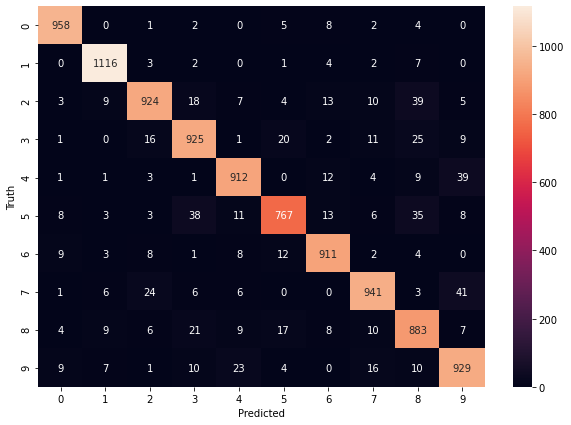

In [48]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2943 - accuracy: 0.9189
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1352 - accuracy: 0.9606
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0969 - accuracy: 0.9715
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0735 - accuracy: 0.9781
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0602 - accuracy: 0.9814


In [52]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9718


[0.09209449589252472, 0.9718000292778015]

Text(69.0, 0.5, 'Truth')

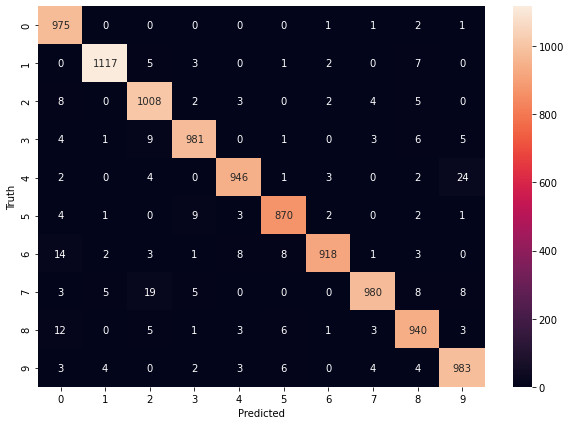

In [55]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2994 - accuracy: 0.9170
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1410 - accuracy: 0.9589
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1008 - accuracy: 0.9704
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0789 - accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0640 - accuracy: 0.9807
